In [4]:
import pandas as pd
import numpy as np
!pip install dill
import dill
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
#загружаем модель
with open('VOTING.dat', 'rb') as f:
    model = dill.load(f)

[00:10:42] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[00:10:42] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [6]:
df = pd.read_csv('df_train_MinMax.csv')
df_t = pd.read_csv('df_test_MinMax.csv')

In [8]:
print(df.shape)
print(df_t.shape)

(139234, 316)
(46412, 316)


In [9]:
df.head()

,client_id,dt,accountsalary_flag,country,profit_income_out_rur_amt_6m,curbal_usd_amt_cm_avg,srvpackage,age,addrref,life_time_days,...,clientsegment_AFFLUENT,clientsegment_MASS,stratsegfactor_Предиктивный доход,stratsegfactor_Реальная зарплата клиента,stratsegfactor_nan,stratsegfactor_Остатки на счетах,stratsegfactor_Зарплата из кредитной анкеты,stratsegfactor_Пакет услуг,stratsegfactor_Инвестиционные продукты,gender_Мужской
0,1f138e1545353a17e75025d76970bb94b73bb98886a914...,2021-07-31,1.0,0.0,0.195491,0.000000,0.0,0.345238,0.0,0.429462,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,fa9a5e85e634829e7d5b0c6cedce9afb286073ef91f1cd...,2021-08-31,1.0,0.0,0.195356,0.000000,0.0,0.476190,0.0,0.735084,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,7ff5fb356c7ce641de81b095990a1c5e17b5365ea6ea1e...,2022-04-30,1.0,0.0,0.196449,0.000044,0.0,0.559524,0.0,0.537788,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,b7d3b6ec38e26f3976191a7490c426ea16deb2c7fdebbd...,2022-11-30,1.0,0.0,0.196768,0.000000,0.0,0.380952,0.0,0.123575,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,ab2036a31d5798d69bc1ef970cc98522b0c3ca8ce003f9...,2021-04-30,1.0,0.0,0.195423,0.000000,0.0,0.392857,0.0,0.661496,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
#соединяем два df : train и test
df_full = pd.concat([df,df_t], ignore_index = True)
df_full.shape

(185646, 316)

In [13]:
feat=['clientsegment_MAFFLUENT',
 'transaction_category_cash_percent_amt_2m',
 'days_to_last_transaction',
 'hdb_bki_total_pil_cnt',
 'curr_rur_amt_cm_avg',
 'clientoutflowstatus_ACTIVE',
 'clientsegment_A-CLUB',
 'accountsalary_flag',
 'life_time_days',
 'gender_Мужской',
 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__tovary_i_uslugi',
 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__fastfud',
 'hdb_bki_total_max_limit',
 'hdb_bki_total_pil_max_limit',
 'sal_rur_amt_curr_v2',
 'transaction_category_supermarket_percent_cnt_2m',
 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__sportivnaja_odezhda',
 'total_inc',
 'transaction_category_pharmacy_percent_cnt_2m',
 'transaction_category_supermarket_sum_amt_m2',
 'curr_rur_amt_curr_v2',
 'curbal_usd_amt_cm_avg',
 'hdb_bki_total_cc_last_days',
 'hdb_bki_last_product_days',
 'stratsegfactor_Пакет услуг',
 'total_rur_amt_curr_v2',
 'avg_amount_daily_transactions_90d',
 'hdb_bki_total_active_products',
 'transaction_category_fastfood_percent_cnt_2m',
 'hdb_bki_total_pil_last_days',
 'transaction_category_supermarket_sum_cnt_m2',
 'stratsegfactor_Остатки на счетах',
 'profit_income_out_rur_amt_6m',
 'age',
 'hdb_other_active_mean_psk',
 'transaction_category_supermarket_inc_cnt_2m',
 'by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona',
 'profit_income_out_rur_amt_12m',
 'clientoutflowstatus_POTENTIAL',
 'hdb_bki_total_cc_max_limit',
 'hdb_bki_total_cnt',
 'transaction_category_other_retail_purchase_percent_cnt_2m',
 'avg_cnt_daily_transactions_30d',
 'transaction_category_other_retail_purchase_sum_amt_m2',
 'transaction_category_pharmacy_inc_amt_2m',
 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__razvlechenija',
 'avg_credit_turn_rur',
 'dda_rur_amt_cm_avg',
 'by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur',
 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__odezhda',
 'transaction_category_money_send_percent_amt_2m',
 'profit_income_out_rur_amt_3m',
 'diff_cur_cr_db_turn',
 'avg_cur_cr_turn']

In [15]:
X = df_full[feat]
y_pred = model.predict(X)

In [16]:
#добавляем новый столбец с предсказаниями
X['pred'] = y_pred

In [17]:
#оставляем только целевую аудиторию
X = X[X['pred']==1]

In [18]:
X.shape

(25845, 55)

In [19]:
features =['gender_Мужской', 'stratsegfactor_Пакет услуг',
              'clientsegment_MAFFLUENT', 
              'by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona' , 'by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur',
              'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__fastfud', 'amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__sportivnaja_odezhda',
              'avg_amount_daily_transactions_90d', 'curbal_usd_amt_cm_avg',
              'transaction_category_supermarket_sum_amt_m2','diff_cur_cr_db_turn']
X_f = X[features]


#Kmeans

In [20]:
#фиксируем random_state
rnd = 42

In [23]:
X_f.describe()

,gender_Мужской,stratsegfactor_Пакет услуг,clientsegment_MAFFLUENT,by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona,by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__fastfud,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__sportivnaja_odezhda,avg_amount_daily_transactions_90d,curbal_usd_amt_cm_avg,transaction_category_supermarket_sum_amt_m2,diff_cur_cr_db_turn
count,25845.000000,25845.000000,25845.000000,2.584500e+04,2.584500e+04,25845.000000,2.584500e+04,2.584500e+04,25845.000000,2.584500e+04,25845.000000
mean,0.605813,0.377336,0.344956,8.945244e-03,8.957889e-04,0.028876,4.007736e-03,8.041382e-03,0.000878,7.440795e-03,0.922241
std,0.488741,0.486036,0.475646,3.062569e-02,8.381804e-03,0.056106,1.663882e-02,1.835783e-02,0.010510,1.227015e-02,0.006251
min,0.000000,0.000000,-0.511085,-4.589309e-08,-3.705502e-09,-0.000010,-1.256956e-07,-1.691551e-07,0.000000,-7.089892e-08,0.000000
25%,0.000000,0.000000,0.000000,3.341144e-05,0.000000e+00,0.000000,0.000000e+00,1.474125e-03,0.000009,2.101255e-03,0.922254
50%,1.000000,0.000000,0.000000,8.114208e-04,0.000000e+00,0.004904,0.000000e+00,3.391602e-03,0.000059,5.371109e-03,0.922279
75%,1.000000,1.000000,1.000000,5.271896e-03,1.018215e-04,0.034862,1.860906e-03,8.021972e-03,0.000283,9.499381e-03,0.922313
max,1.137672,2.472511,1.000000,1.000000e+00,1.000000e+00,1.000000,6.852866e-01,1.000000e+00,1.000000,1.000000e+00,1.000000


In [26]:
# для 10 признаков
kmeans = KMeans(n_clusters=5, random_state=rnd)
X_f['cluster'] = kmeans.fit_predict(X_f) 
kmeans.labels_
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

X_f['cen_x'] = X_f.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
X_f['cen_y'] = X_f.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

In [27]:
X_f['cluster'].value_counts()

4    6090
0    6077
2    4821
3    4758
1    4099
Name: cluster, dtype: int64

In [ ]:
X_f['cluster'].value_counts()

1    8608
2    4785
0    4721
4    4098
3    3531
Name: cluster, dtype: int64

In [28]:
# разделим по группам для 10 признаков
X_0 = X_f[X_f['cluster']==0]
X_1 = X_f[X_f['cluster']==1]
X_2 = X_f[X_f['cluster']==2]
X_3 = X_f[X_f['cluster']==3]
X_4 = X_f[X_f['cluster']==4]

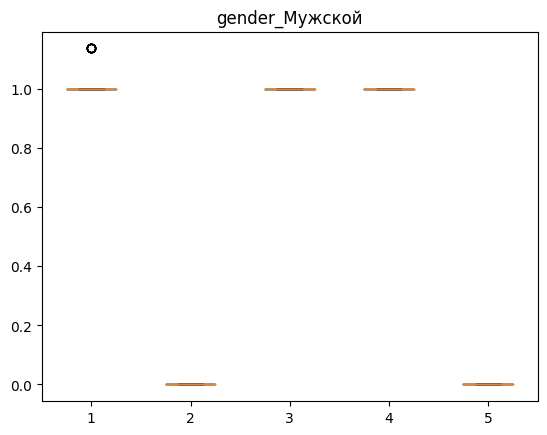

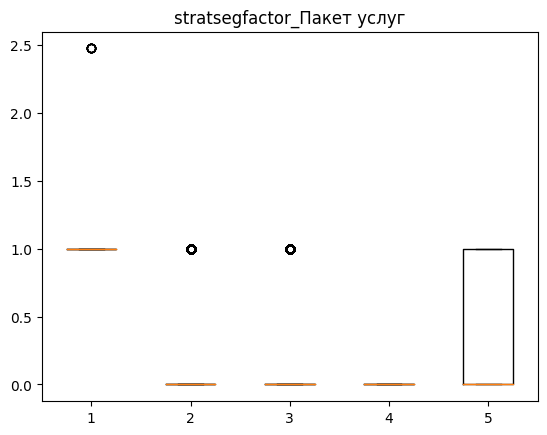

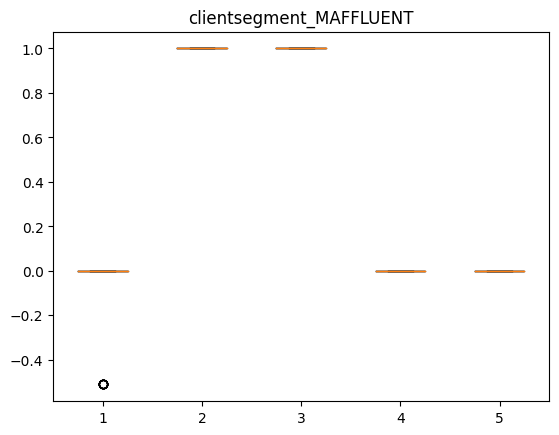

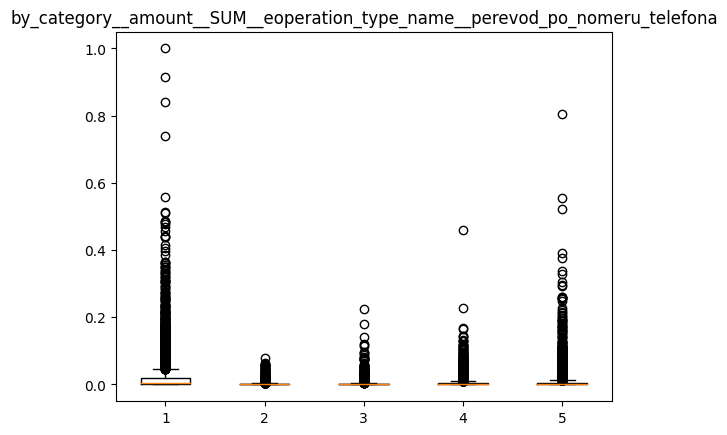

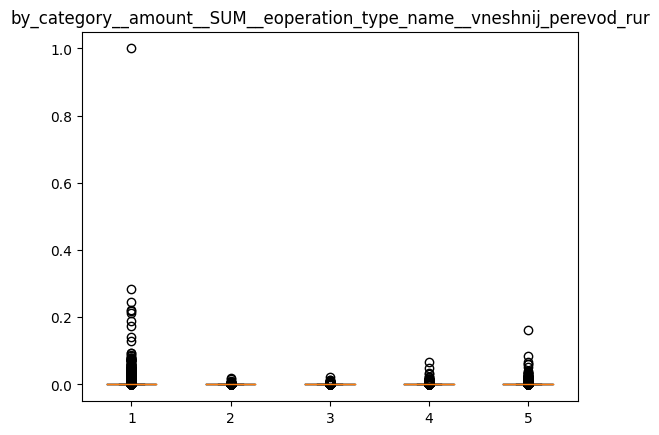

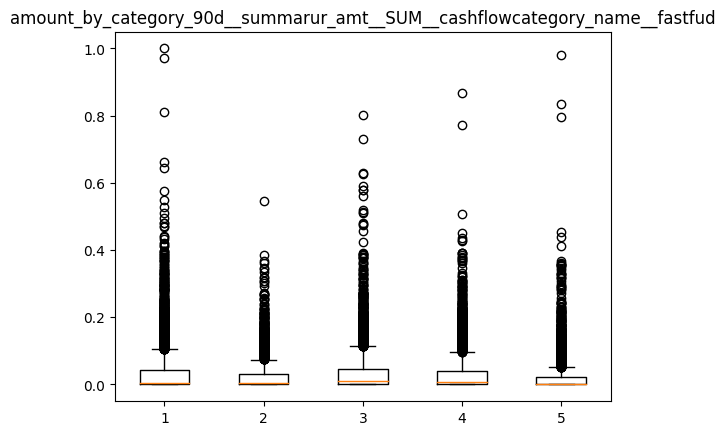

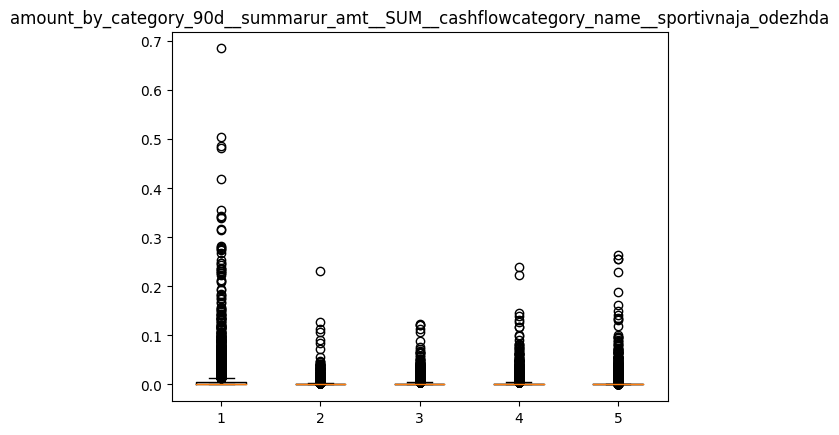

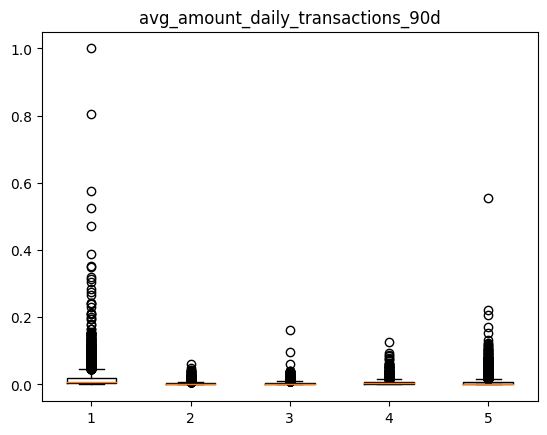

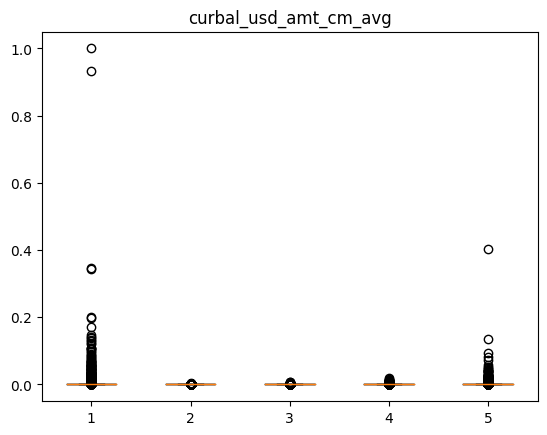

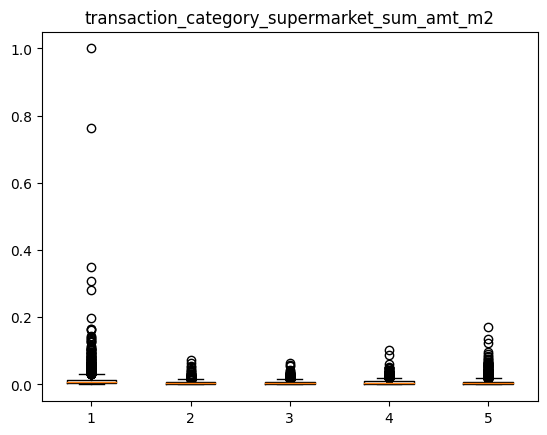

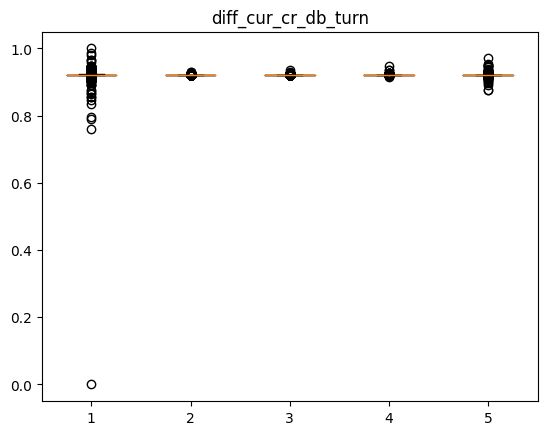

In [31]:
for i in range(len(features)):
    fig, ax = plt.subplots()
    ax.boxplot([X_0[features[i]],X_1[features[i]],X_2[features[i]],
               X_3[features[i]],X_4[features[i]]])
    ax.set_title(features[i])
    plt.show()

In [43]:
df_full['pred']=y_pred
X_f['target']=df_full[df_full['pred']==1]['target'].values

In [44]:
X_f['client_id']=df_full[df_full['pred']==1]['client_id'].values
X_f['dt']=df_full[df_full['pred']==1]['dt'].values

In [ ]:
X_f['pred']=df_full[df_full['pred']==1]

In [48]:
y_pred_proba = model.predict_proba(df_full[feat])[:,1]

In [49]:
df_full['pred_proba']=y_pred_proba
X_f['pred_proba']=df_full[df_full['pred']==1]['pred_proba'].values

In [50]:
X_f

,gender_Мужской,stratsegfactor_Пакет услуг,clientsegment_MAFFLUENT,by_category__amount__SUM__eoperation_type_name__perevod_po_nomeru_telefona,by_category__amount__SUM__eoperation_type_name__vneshnij_perevod_rur,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__fastfud,amount_by_category_90d__summarur_amt__SUM__cashflowcategory_name__sportivnaja_odezhda,avg_amount_daily_transactions_90d,curbal_usd_amt_cm_avg,transaction_category_supermarket_sum_amt_m2,diff_cur_cr_db_turn,cluster,cen_x,cen_y,target,client_id,dt,pred_proba
2,0.000000,1.000000,0.000000,0.000000e+00,1.682446e-04,0.000000,0.000000e+00,8.694354e-04,4.431352e-05,2.287279e-03,0.922251,4,NaN,NaN,0.0,7ff5fb356c7ce641de81b095990a1c5e17b5365ea6ea1e...,2022-04-30,0.576641
16,1.000000,1.000000,0.000000,2.230612e-03,3.261518e-04,0.014916,0.000000e+00,1.473194e-03,3.455897e-05,2.628022e-03,0.922289,0,1.000204,1.002181,0.0,d04e3737acbc807b28c0c1814b528db2f4481c156a5a9b...,2022-08-31,0.727069
23,1.000000,1.000000,0.000000,3.977553e-04,1.384126e-05,0.024244,6.886872e-02,1.332720e-02,9.226409e-04,8.507926e-03,0.922477,0,1.000204,1.002181,0.0,e14ee938b8fcfdc5b47d45652db058dd4b63129cd86289...,2022-02-28,0.879319
24,1.000000,0.000000,0.000000,5.791317e-05,0.000000e+00,0.014276,6.312660e-04,9.568484e-04,5.365001e-05,9.671952e-03,0.922242,3,NaN,NaN,0.0,e431aca76bb552f05917562f1b869714c93e6a15c5cb6f...,2021-07-31,0.647889
44,1.000000,0.000000,1.000000,2.906477e-04,0.000000e+00,0.031244,9.487966e-04,1.079984e-03,8.235625e-05,3.174433e-03,0.922189,2,1.000000,0.144783,0.0,2edf1c04585adbc3ad0a9aba854e874f208e3ec91b4b14...,2022-09-30,0.608723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152152,1.137672,2.472511,-0.511085,2.147064e-07,2.864294e-09,0.000004,4.423422e-08,3.378908e-06,1.450422e-06,2.680266e-07,0.922278,0,1.000204,1.002181,1.0,7791146ef5c1f6ac468b7fc1541e5893c9b40b001c2a31...,2021-08-31,0.520229
154027,1.137672,2.472511,-0.511085,-2.238656e-08,-3.705502e-09,-0.000010,-1.256956e-07,-7.028943e-08,1.478290e-06,-7.089892e-08,0.922278,0,1.000204,1.002181,1.0,c0eb5d153c17c04be9d4e1fde872baa4c07d7b33caa807...,2022-02-28,0.535402
163577,1.137672,2.472511,-0.511085,-4.589309e-08,-3.705502e-09,-0.000010,1.601972e-06,8.427531e-07,1.454264e-07,5.318123e-07,0.922278,0,1.000204,1.002181,1.0,d511aa63138d8fa32adf595ebc33c75bb8f44d36b17c05...,2021-04-30,0.508819
179388,1.137672,2.472511,-0.511085,-4.589309e-08,-3.705502e-09,-0.000010,-1.256956e-07,-1.691551e-07,2.612810e-06,-7.089892e-08,0.922278,0,1.000204,1.002181,1.0,de1b0d0bbfbcac1100ec6d78458dc26735ded0cc1c2820...,2021-04-30,0.519262


In [51]:
X_f.to_csv('Kmeans_df.csv', index = False)

Код для кластеризации таргета и предиктов

In [ ]:
from umap.umap_ import UMAP

In [ ]:
X_test_1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/test_1.csv')
X_test_1 = X_test_1.drop('target', axis = 1)
y_pred = model.predict(X_test_1)
y_pred

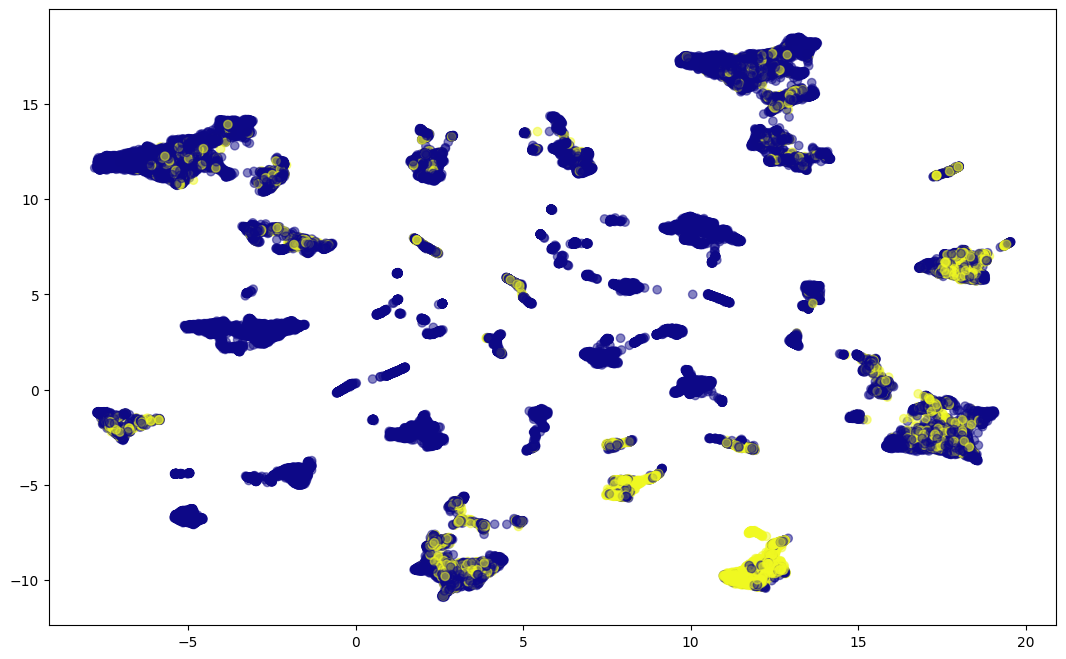

In [ ]:
mapper = UMAP(n_components=2, n_neighbors=50, random_state=2021)
mapper.fit(X_test_1)
embedded = mapper.transform(X_test_1)

SIZE = (13, 8) 

plt.figure(figsize=SIZE)
plt.scatter(embedded[:,0], embedded[:,1], c=y_pred, alpha=0.5, cmap='plasma')
plt.show()

In [ ]:
mapper = UMAP(n_components=2, n_neighbors=50, random_state=2021)
mapper.fit(X_test_1)
embedded = mapper.transform(X_test_1)

SIZE = (13, 8) 

plt.figure(figsize=SIZE)
plt.scatter(embedded[:,0], embedded[:,1], c=y_pred, alpha=0.5, cmap='plasma')
plt.show()